作为数据分析师，除了熟练各种分析工具外，更重要的是分析、解决问题的能力以及扎实的数学功底，尤其是统计学。

本文将用一个例子，一步一步展示1)分析问题的步骤，2)更具需求选择合适工具和数据获取，3)和统计学知识在实例中的运用。

*本文涉及例子和数据纯属虚构，如有雷同纯属巧合。*

商业问题：是否需要多招一个奶茶工？

我的朋友小文在大学城开了一个奶茶店。由于开在大学城，奶茶店生意稳定，从周一到周日生意都差不多。现在奶茶店里有2个员工做奶茶，而点单则是由自助点单机器负责。一天小文去店里看运营情况，收到顾客反映等待时间太久，希望奶茶店再招些员工让等待时间短一些。考虑到工资成本，小文找到我让我帮助分析下是否需要再招个人，如果我可以出一个让他信服的商业分析报告，他就免费送我20杯奶茶的礼券。那我肯定不能错过这个免费喝奶茶的机会，于是和小文了解了奶茶店的情况后制定了以下分析步骤：

* 分析、理解问题
* 获取、导入数据
* 数据清洗
* 数据分析与可视化
* 构建模型
* 总结

# 分析、理解问题

与小文交流后，我把小文的问题“是否需要再招一个奶茶工？”转换成以下问题：为了提高顾客满意度，分析决定是否有95%的顾客实际等待时间超过他们的预期等待时间，如果是则小文需要至少再招一个人。

**量化问题是解决问题的重要步骤之一**。也就是说，需要量化**等待时间**来决定是否多招人，而不是因为有几个顾客反映等待时间过长的反馈进行决策。要解决等待时间是否过长需要2个数据指标：1)目标指标，95%顾客的可接受等待时间。2)客观计算或测量数据，95%的顾客的实际等待时间。

**首先要确定目标指标。** 这里95%顾客可接受等待时间是值顾客的心里预期，所以需要顾客主观给出一个认为可以接收的等待时间，而如果等待时间过长，久而久之等待时间过长的顾客就可以去其他奶茶店买奶茶了。因此，我决定使用[**随机抽样调查**](https://baike.baidu.com/item/%E6%8A%BD%E6%A0%B7%E8%B0%83%E6%9F%A5%E6%B3%95)来获取这一数据。首先，我设计了一个简单的问题：买奶茶，您愿意的等待时间？a.1分钟。b.5分钟 c.10分钟 d.15分钟 e.20分钟 f.25分钟。然后我在一周内随机去小文的奶茶店询问了正在等待的顾客，一共收集到了200个顾客的反馈。然后，我可以通过这200个随机抽取的样本去估计所有顾客的心里预期，最终得到有189的顾客(大约95%)可接受的等待时间为**15分钟或者以下**。这里到了一些常用统计学知识，可以通过[这篇文章了解为什么可以用样本去估计整体](https://blog.csdn.net/YPP0229/article/details/94594306)？以及[这个回答，为什么设置95%](https://www.zhihu.com/question/26419030)？

**下一步需要选择合适的方法得到顾客实际等待时间**，我们可以通过以下方法：

1. 使用数学公式计算。对于如此多步骤的复杂问题，我们很难使用数据公式求解，因此使用数学公式不是合适选项。

2. 实地测量顾客等待时间。实地测量是非常耗时耗力的，对于付出(一周甚至是更久的实地测量)回报(20杯奶茶)比来说，实地测量不是一个好的选择。

3. 利用模拟实验得到等待时间。模拟实验是指使用代码来模拟当前卖奶茶的流程，并通过模拟实验模拟顾客的等待时间，如果模拟实验的数据能真实可靠地获得，那模拟实验就能很好地模拟真实情况。举个简单的例子理解模拟实验：一个袋子里有3个小球，一个红球，两个白球。问随便从袋子中取一个球，取到红球的概率。使用Python进行模拟实验可以使用以下代码。

```python
import random
import numpy as np
# 模拟一个袋子，一个红球red,两个白球white
pocket = ['red', 'white', 'white']
# 记录每次摸球结果的列表
lst_result = []
# 模拟摸球1000000次
for t in range(1_000_000):
    lst_result.append(random.choice(pocket))
# 计算1000000次摸球中，摸到红球的比例。
lst_result = np.array(lst_result)
print((lst_result== 'red').sum()/len(lst_result))
0.333253
```
可以看到在一瞬间计算机就能进行一百万次模拟实验，最终得到摸到红球的概率是0.333253，所以在大量的模拟实验下，最终结果是非常接近真实结果的。其实对于这个简单的例子，概率公式```1/3```就能得到结果，但是对于卖奶茶的流程，不是简单的数学公式能计算出来的，而模拟实验正好能发挥他的作用。

**接下来要衡量模拟实验的可行性。**

* 第一，整理卖奶茶的流程。下图为卖奶茶流程图：

![milk_tea](img/milk_tea_case.png)




* 第二，检查数据是否可取得。

通过流程整理，我们知道模拟的第一步是模拟订单数据，那就需要**历史订单数据**。通过分析历史订单数据，我们可以得出规律并生模拟新的订单数据(主要是订单生成时间，和每单奶茶杯数)。

然后模拟第二步订单进入等待队列，产生的等待时间为t1，如果员工空闲那就可以立刻开始订单，此时t1=0。

模拟第三步员工制作奶茶，这时候需要**每个员工制作奶茶的时间数据**，并根据这一数据生成每杯奶茶的制作时间的模拟数据，而制作奶茶的时间为t2。最终就能得到每个订单的模拟等待时间t1+t2。

所以只要得到**历史订单数据**，和**员工做每杯奶茶的时间**就可以进行模拟。历史订单数据非常容易取得，只要从奶茶店销售系统中调取。员工做奶茶的时间并没有现成数据，于是我和小文商量了只要提供2个电子计时器，每次员工只要在开始和结束奶茶制作的时候按下计时器，就能得到奶茶制作时间。

经过以上思考，我们总结下问题。

**解决的问题**：为了提高顾客满意度，分析是否有95%的顾客实际等待时间超过他们的预期等待时间，来决定是否招人。

**量化指标**：1)95%顾客的预期等待时间。2)95%顾客的实际等待时间

**方法选择**：1)问卷调查获取顾客预期等待时间。2)模拟实验模拟实际等待时间。

**数据需求**：1)历史订单数据。2)收集员工做每杯奶茶的时间。

**问题前提和假设**：1)等待时间不包括点单时间，员工走动取单和送奶茶时间，只计算等待时间t1和奶茶制作时间t2作为总等待时间。2)期间没有任何促销，平均客流量稳定。3)顾客之间相互独立，即每位顾客来买奶茶不受其他顾客影响。4)员工做奶茶已经娴熟，做每杯奶茶的平均时间长期稳定，并且不同类型的奶茶平均制作时间一样。5)员工接到订单后完成整个订单，比如一个订单需要做3杯奶茶，则由一个员工完成所有奶茶。


# 获取、导入数据

模拟实验用到了2个数据集－历史订单数据和员工做每杯奶茶的时间。*这两个数据集是使用Python模拟的数据，非真实数据。*

In [1]:
from collections import deque
from datetime import datetime
from scipy.stats import poisson, norm
from scipy.interpolate import make_interp_spline
import numpy as np
import random
import pandas as pd
from pylab import mpl
import matplotlib.pylab as plt # 数据可视化
plt.style.use('ggplot') # 设置风格使图标更美观
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定字体雅黑，使图标可以显示中文
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [2]:
file_dir = r'/mnt/data-ubuntu/Projects/data_science_chinese'
df_lead_time = pd.read_csv(file_dir + r'/input/da_statics/lead_time.csv')
df_sales = pd.read_csv(file_dir + r'/input/da_statics/sales_sample.csv')

In [3]:
# 随便看一组数据
df_sales[df_sales['sample_group']== 934]

,sample_group,time,order_qty
18786,934,18:04:05,1
18787,934,18:09:51,1
18788,934,18:26:26,4
18789,934,18:29:35,2
18790,934,18:31:22,2
18791,934,18:40:06,1


df_sales是在历史销售数据集中随机抽取了2000个小时的订单生成时间和下单杯数。sample_group是随机抽取小时的编号，time是在对应小时内订单生成时间，order_qty是在对应订单的奶茶下单杯数。

In [4]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40269 entries, 0 to 40268
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sample_group  40269 non-null  int64 
 1   time          40269 non-null  object
 2   order_qty     40269 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 943.9+ KB


数据一共40269行，并无缺失数据。

In [5]:
# 查看员工每杯奶茶制作时间数据
df_lead_time.head()

,work1,work2
0,147,248
1,161,255
2,162,216
3,153,271
4,146,256


work1代表记录的员工1做每杯奶茶的时间，单位秒。work2代表记录的员工2做每杯奶茶的时间，单位秒。

In [6]:
df_lead_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   work1   996 non-null    int64
 1   work2   996 non-null    int64
dtypes: int64(2)
memory usage: 15.7 KB


该数据有996行数据，并无缺失值。

# 数据清洗

这2个数据集为模拟数据，简单整洁且无缺失值，不需要进行数据清洗。

# 数据分析与可视化

我们的目标是在模拟实验中生成模拟订单，包含了在某一时间点生成订单与下单数量。所以我们分析历史数据订单生成有什么规律，和下单数量有什么规律。

此外，对于每个员工做一杯奶茶的时间也要进行分析并找出规律，以便在模拟实验中生成合理的制作时间。

## 历史订单数据

### 下单时间分析
对于单行数据我们很难看出规律，既然数据是根据一小时统计的，那我们看看一小时有多少订单生成。

In [7]:
# 每小时订单数量
df_sales.groupby('sample_group').count()['time'].head()

sample_group
0    15
1    16
2    27
3    22
4    15
Name: time, dtype: int64

可以看到每小时的订单数量各不相同。接下来我们汇总下不同“每小时订单数量”的个数，并通过可视化呈现出来。

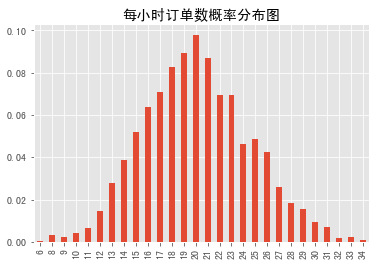

每小时订单数的平均值为20。


In [8]:
# 除以总小时数得到每种可能性的概率
df_sales \
    .groupby('sample_group') \
    .count()['time'] \
    .value_counts(normalize = True)\
    .sort_index() \
    .plot(kind = 'bar',
          figsize = (6,4),
          title = '每小时订单数概率分布图')
plt.show()
# 每小时订单数平均值
mu = df_sales.groupby('sample_group').count()['time'].mean().astype('int')
print(f'每小时订单数的平均值为{mu}。')

图的x轴是每小时订单数的可能值，y轴是每个值对应的概率，这些不同值对应概率的总和是1。可以看到每小时订单数在20的概率最高，这也与每小时订单数的平均值20相对应。

这个分布称为泊松分布([Poisson Distribution](https://en.wikipedia.org/wiki/Poisson_distribution))。泊松分布是一种[离散型概率分布](https://zh.wikipedia.org/wiki/%E6%A6%82%E7%8E%87%E5%88%86%E5%B8%83#%E7%A6%BB%E6%95%A3%E5%88%86%E5%B8%83)，用来表示在一段时间内一个事件发生数量的概率分布，并且要求事件的平均值在这段时间中不改变，每个发生点之间独立无联系。比如一个公司一小时接听到电话的数量，有可能是1通电话，10通电话，或者是20通电话。他是一个不确定的随机事件，如果每小时接听到电话的平均数量是10，那我们就可以用平均数量构建一个泊松分布。

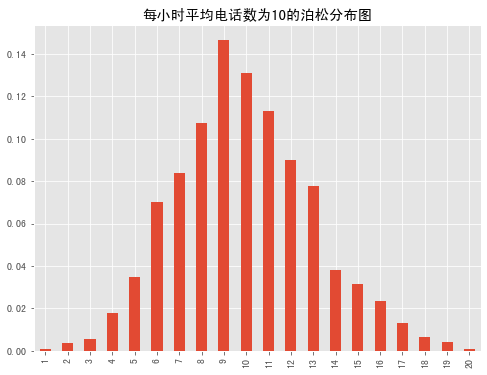

In [9]:
test_samples = poisson.rvs(10, size = 2000, random_state = 44)
pd.Series(test_samples) \
    .value_counts(normalize = True) \
    .sort_index() \
    .plot(kind = 'bar',
          figsize = (8,6),
          title = f'每小时平均电话数为10的泊松分布图')
plt.show()

但使用泊松分布公式并不能生成我们希望的模拟数据，我们需要的数据是像df_sales中的time一样的订单时间数据，这样在模拟的时候才能知道在哪个时间点会有新订单生成。因此我们需要使用指数分布函数([exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution))生成泊松分布点的时间间隔。

比如，起始时间是t0=0，第一个泊松分布点出现的时间是t1，第二个点是t2，第三个点是t3...以此类推，而t1-t0=x1为一个时间间隔，t2-t1=x2为第二个时间间隔...这一系列x为随机变量，我们可以使用指数分布函数生成随机时间间隔，从而构建符合泊松分布的事件。假设一个公司每小时接到的平均电话为10通，那我们就能这样生成随机电话事件：

In [10]:
avg_calls = 10   # 每小时平均电话数
timespan = 3600  # 每个模拟时长3600秒
start = 0        # 起始时间0秒
lst_calls = []   # 记录电话打进时间
for s in range(timespan):
    # 生成随机时间间隔，random.expovariate 是random包中的指数函数。
    time_interval = int(random.expovariate(avg_calls/timespan))
    start += time_interval
    # 限定时间是一小时
    if start < timespan:
        lst_calls.append(start)
lst_calls = [str(s)+'s' for s in lst_calls]
print(f'模拟一小时，一共收到{len(lst_calls)}通电话。分别在以下时间收到：')
print(','.join(lst_calls))

模拟一小时，一共收到17通电话。分别在以下时间收到：
169s,287s,486s,932s,1224s,1251s,1349s,1409s,1567s,1789s,2240s,2429s,2544s,3020s,3236s,3392s,3474s


这样我们就能生成符合泊松分布的事件发生的时间点，希望了解更多关于泊松分布的知识可以阅读[这篇文章](https://towardsdatascience.com/the-poisson-process-everything-you-need-to-know-322aa0ab9e9a)，以及[这篇](https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459)。接下来要解决如何生成每个订单的奶茶杯数。

### 订单奶茶杯数

每个订单的奶茶杯数是一个整数，我们希望通过分析历史销量得出出如何合理地生成每个订单的杯数。先看下每个订单的平均杯数的可能性：

In [11]:
df_sales.order_qty.value_counts()

1    28246
2     8112
3     1970
4     1565
5      264
6      112
Name: order_qty, dtype: int64

在这个数据集中，绝大多数人买1杯到6杯，肯定也有人买超过6杯，但是在我们取样了这么多订单也没有出现大于6杯的样本，说明1到6杯已经基本包括了所有可能性，我们可以忽略超过6杯的极小情况。既然这样我们可以构建一个简单的概率模型来随机生成订单杯数。

In [12]:
df_sales.order_qty.value_counts(normalize = True).round(3)

1    0.701
2    0.201
3    0.049
4    0.039
5    0.007
6    0.003
Name: order_qty, dtype: float64

这样便得到了所有杯数可能性的概率，这些概率的总和是1，所以只要生成一个0到1之间的随机数，这个随机数落在哪个概率区间就生成相应杯数。

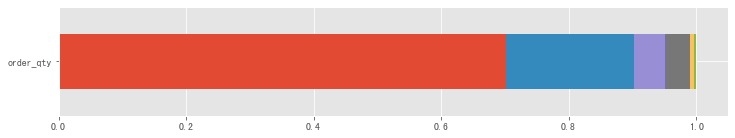

In [13]:
df_sales \
    .order_qty \
    .value_counts(normalize = True) \
    .round(3) \
    .reset_index().T \
    .loc[['order_qty'], :] \
    .plot(kind = 'barh',
          stacked=True,
          figsize = (12, 2),
          legend=False)
plt.show()

如上图所示，如果随机数落在红色区域杯数就是1，落在蓝色区域就是2,落在紫色区域就是3，以此类推，就能生成合理的随机杯数。

## 员工做每杯奶茶的时间

另一个需要模拟生成的是员工做每杯奶茶的时间。不同员工做奶茶的时间和做每杯奶茶的实时间都是不同的，因此为了更真实地模拟实际情况，做每杯奶茶的时间因基于一定的规则随机生成合理值。接下来我们就来找一下这个规则。

In [14]:
print('='*10 + 'worker1' + '='*10)
print(df_lead_time.work1.describe())
print('='*10 + 'worker2' + '='*10)
print(df_lead_time.work2.describe())

==========worker1==========
count    996.000000
mean     149.211847
std       10.020797
min      121.000000
25%      142.000000
50%      149.000000
75%      156.000000
max      179.000000
Name: work1, dtype: float64
==========worker2==========
count    996.000000
mean     238.692771
std       19.100054
min      185.000000
25%      226.000000
50%      239.000000
75%      252.000000
max      297.000000
Name: work2, dtype: float64


可以看到员工1平均做一杯奶茶的时间短与员工2，并且员工1做每杯奶茶的时间比员工2稳定(员工1的标准差10小于员工2的标准差19)。我们再用图表看下员工1做奶茶时间的分布情况。

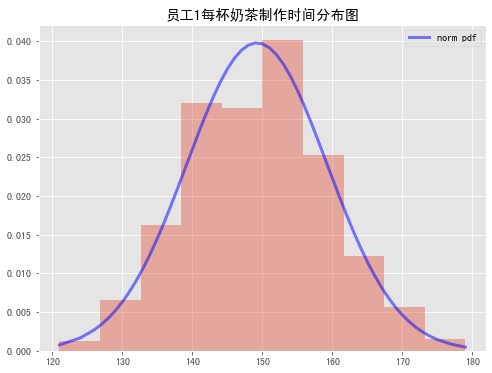

In [15]:
fig, ax = plt.subplots(figsize = (8,6))
ax.hist(df_lead_time.work1, alpha=0.4, density = True)
x = df_lead_time.work1.sort_values()
y = norm.pdf(x,
             df_lead_time.work1.mean(),
             df_lead_time.work1.std())
ax.plot(x, y,
        'b-', lw = 3, alpha = .5, label='norm pdf')
ax.legend()
plt.title('员工1每杯奶茶制作时间分布图')
plt.show()

形状和订单的泊松分布很相似，但是不同的横坐标的时间是[**连续型随机变量**](https://zhuanlan.zhihu.com/p/38224194#:~:text=%E7%A6%BB%E6%95%A3%E5%9E%8B%E9%9A%8F%E6%9C%BA%E5%8F%98%E9%87%8F%EF%BC%9A%E9%9A%8F%E6%9C%BA,%E4%B8%80%E4%B8%AA%E8%BF%9E%E7%BB%AD%E5%9E%8B%E9%9A%8F%E6%9C%BA%E5%8F%98%E9%87%8F%E3%80%82)。抽取的996个样本根据[中心极限定理](https://zh.wikipedia.org/wiki/%E4%B8%AD%E5%BF%83%E6%9E%81%E9%99%90%E5%AE%9A%E7%90%86)符合[正态分布](https://zh.wikipedia.org/wiki/%E6%AD%A3%E6%80%81%E5%88%86%E5%B8%83)，关于通俗地理解中心极限定理可以阅读[这篇文章](https://zhuanlan.zhihu.com/p/25241653)。此外有些同学可能会觉得这个是抽样调查应该按照[t分布](https://zh.wikipedia.org/wiki/%E5%AD%A6%E7%94%9Ft-%E5%88%86%E5%B8%83)计算标准差，但由于这个例子中样本量大我们直接使用总体的标准差计算公式。

知道了样本数据的平均值和标准差后，我们就可以使用scipy中norm.rvs()生成模拟数据。

# 构建模型

这里的模型构建指的是根据买奶茶的流程，和分析得到的数据模拟方法来构建整个模拟实验。

模型主要分为以下几步：

1. 新订单生成
2. 加入等待队列
3. 员工制作奶茶
5. 制作完成，计算等待时间
6. 多次模拟实验

再构建模拟实验前，我们先创建订单的类和员工的类。

In [16]:
# 订单类
class Order:
    
    def __init__(self, order_time, order_qty):
        """
        创建实例对象生成订单时间和订单杯数。
        Params:
            order_time: int
            订单生成的时间。
            order_qty: int
            订单杯数。
        Return:
            None.
        """
        self.qty = order_qty
        self.order_time = order_time
    
    def waiting_time(self, current_time):
        """
        根据当期时间计算订单等待时间。
        Params:
            current_time: int
            当前时间。
        Return:
            current_time - self.order_time: int
            等待时间。
        """
        return current_time - self.order_time
    


In [17]:
# 员工类
class Worker:
    
    def __init__(self, avg_making_time, std_making_time):
        """
        创建员工实例对象。
        Params:
            avg_making_time: float
            每杯奶茶平均制作时间。
            std_making_time: float
            每杯奶茶制作时间标准差。
        Return:
            None.
        """
        self.avg = avg_making_time
        self.std = std_making_time
        self.current_order = None
        self.time_remaining = 0
    
    def start_new(self, new_order):
        """
        开始制作新的订单。根据第五点前提和假设，
        员工接到订单后完成整个订单，比如一个订单需要做3杯奶茶，
        则由一个员工完成所有奶茶。
        Params:
            new_order: Order object
            Order对象。
        Return:
            self.time_remaining: int
            new_order中所有奶茶制作时间的总和。
        """
        self.current_order = new_order
        self.time_remaining = 0
        for cup in range(self.current_order.qty):
            self.time_remaining += Worker.make_time(self.avg, self.std)
        return self.time_remaining

    def making(self):
        """
        开始制作新的订单。
        Params:
            new_order: Order object
            Order对象。
        Return:
            self.time_remaining: int
            new_order中所有奶茶制作时间的总和。
        """
        if self.current_order:
            self.time_remaining -= 1
            if self.time_remaining <= 0:
                self.current_order = None
            
    def is_busy(self):
        """
        判断员工是否正在做奶茶。
        Params:
            None
        Return:
            boolean
            正在做奶茶返回True，反之则返回False.
        """
        return self.current_order is not None
            
    @staticmethod
    def make_time(avg, std):
        """
        静态方法，根据员工制作每杯奶茶的平均时间和标准差，利用
        正态分布函数生成随机制作时间。如果制作直接小于或者大于
        3个标准差则取3个标准差为其制作时间。
        Params:
            avg: float
            std: float
        Return:
            time: int
            一杯奶茶制作时间。
        """
        time = norm.rvs(avg, std)
        time = (lambda x: int((avg - 3*std)) \
                          if time < (avg - 3*std) \
                          else int(time) \
                               if time < (avg + 3*std) \
                               else int((avg + 3*std)))(time)
        return time


定义完类之后，我们开始创建模拟实验。

In [18]:
# 根据我们之前分析销售记录得到的不同杯数的概率，产生随机每个订单的随机杯数。
def order_qty(order_percentage):
    """
    根据不同杯数的概率生成随机杯数。
    Params:
        order_percentage: list
        不同杯数的概率。
    Return:
        qty: int
        订单杯数。
    """
    u = random.random()
    qty = 0
    p = 0
    for i in range(len(order_percentage)):
        p += order_percentage[i]
        qty += 1
        if u < p:
            return qty

# 与真实情况不同，模拟实验在开始实验就先生成了一段时间内的随机事件点
def create_orders(avg_order, total_seconds=3600):
    """
    生成一段时间内的随机事件点。生成事件符合泊松分布。
    Params:
        avg_order: int
        泊松分布的平均值。
        total_seconds: int
        选取的事件发生时间长度。默认3600秒。
    Return:
        lst_order_time: lst
        一系列随机事件的发生时间。
    """
    lst_order_time = []
    arriving_time = 0
    for s in range(total_seconds):
        interval = int(random.expovariate(avg_order/total_seconds))
        arriving_time += interval
        if arriving_time < total_seconds:
            lst_order_time.append(arriving_time)
        else:
            break
    return lst_order_time

# 模拟实验
def simulation(num_seconds = 3600):
    # 创建等待队列
    queue = deque()
    # 创建列表保存模拟实验等待时间
    lst_waiting = []
    # 创建员工1
    w1 = Worker(df_lead_time.work1.mean(), df_lead_time.work1.std())
    # 创建员工2
    w2 = Worker(df_lead_time.work2.mean(), df_lead_time.work2.std())
    # 计算不同杯数的概率
    lst_p = df_sales.order_qty.value_counts(normalize=True).round(3).to_list()
    # 生成一小时内生成的随机事件。
    set_new_orders = set(create_orders(mu))
    
    # 从0秒循环到3600秒
    for s in range(num_seconds):
        # 如果当前时间(s秒)发生随机时间，则创建新订单并排入等待队列
        if s in set_new_orders:
            o = Order(s, order_qty(lst_p))
            queue.appendleft(o)
        # 如果员工1空闲并且等待队列中有订单，则员工1开始制作该订单。
        if (not w1.is_busy()) & (len(queue)>0):
            new_order = queue.pop()
            # 返回订单在等待队列的等待时间。
            waiting_t = new_order.waiting_time(s)
            # 员工接单，返回整单制作时间。
            # 这里模拟实验与实际情况不同，因为在模拟中员工一接订单就生成了制作时长。
            making_t = w1.start_new(new_order)
            # 总等待时间等于 = 等待时间 + 制作时间, 换算成分钟方便与顾客预期对比。
            lst_waiting.append(round((waiting_t + making_t)/60 , 2))
        # 员工2情况与员工1相同。
        if (not w2.is_busy()) & (len(queue)>0):
            new_order = queue.pop()
            waiting_t = new_order.waiting_time(s)
            making_t = w2.start_new(new_order)
            lst_waiting.append(round((waiting_t + making_t)/60 , 2))
            

        w1.making()  #员工1制作奶茶
        w2.making()  #员工2制作奶茶
    
    return lst_waiting

# 进行5000个小时模拟实验。
num_sim = 5000
# 保存所有订单等待时间。
lst_w = []
for i in range(num_sim):
    lst_w += simulation()

我们来分析下实验结果，看看小文是否需要再雇人。

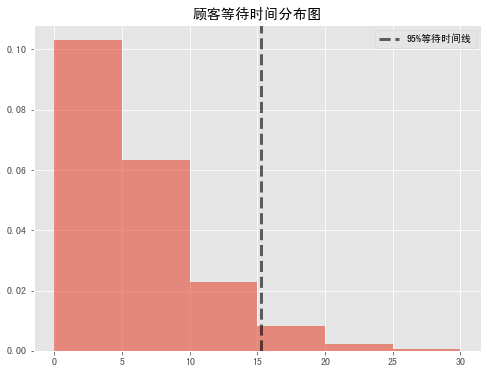

进行5000次模拟实验后的平均等待时间为6.35分钟。
百分之95的顾客等待时间少于15.3分钟。


In [19]:
lst_w.sort()
plt.figure(figsize=(8,6))
plt.hist(lst_w,
         alpha=.6,
         density = True,
         bins=[0, 5, 10, 15, 20, 25, 30])

# 落在95%的订单等待时间
waiting_95p = lst_w[round(len(lst_w)*0.95)]

plt.axvline(waiting_95p,
            color='k',
            linestyle='dashed',
            linewidth=3,
            alpha = .6,
            label = '95%等待时间线')
plt.title('顾客等待时间分布图')
plt.legend()
plt.show()

print(f'进行{num_sim}次模拟实验后的平均等待时间为{round(np.mean(lst_w), 2)}分钟。')
print(f'百分之95的顾客等待时间少于{waiting_95p}分钟。')

从上图看到，实验的平均等待时间只有6.35分钟，百分之95的顾客等待时间少于15.3分钟，稍稍大于顾客预期15分钟，但已与95%顾客的预期接近。相信小文的选择肯定是不再多付一个人的工资成本去提高不到5%的顾客满意度了。

# 总结

通过本文例子我们学到：

* 数据分析解决实际问题的思考方法和步骤，根据需求和实际情况选择工具，和获取数据。
* 如何在数据分析中利用统计学知识：1)随机抽样获取样本。2)使用泊松分布和简单概率分布模拟订单信息。3)利用正态分布模拟每杯奶茶的制作时间。
* 使用Python构建模拟实验为决策提供指导。

感谢您的阅读，您的喜欢和点赞是我分享的动力。有兴趣的同学可以点击这里获取文章Jupyter Notebook。

In [20]:
# # 生成测试数据
# from scipy.stats import poisson, norm
# import pandas as pd
# import numpy as np
# import random
# import datetime


# def order_qty(order_percentage):
#     """
#     Generate order quantity.
#     Params:
#        The percentage corresponding to each order quantity.
#     Return:
#         qty: int
#         Order quantity generated.
#     """
#     u = np.random.uniform(0,1)
#     qty = 0
#     p = 0
#     for i in range(len(order_percentage)):
#         p += order_percentage[i]
#         qty += 1
#         if u < p:
#             return qty

# # Generate order time.
# num_records = 2000
# mu = 20
# sample_len =3600
# lst_p = [0.7, 0.2, 0.05, 0.04, 0.007, 0.003]

# # List to store all order times.
# lst_group_num = []
# lst_order_times = []
# lst_order_qty = []
# # Open hour of a day.
# lst_hours = range(12, 20)
# for n in range(num_records):
#     start_hour = datetime.datetime.strptime(str(lst_hours[n % len(lst_hours)]), '%H')
#     arriving_time = 0
#     for t in range(sample_len):
#         interval = int(random.expovariate(mu/sample_len))
#         arriving_time = arriving_time + interval
#         if arriving_time < sample_len:
#             lst_group_num.append(n)
#             lst_order_times.append((start_hour + datetime.timedelta(seconds=arriving_time)).time())
#             lst_order_qty.append(order_qty(lst_p))
#         else:
#             break

# # Create a dataframe to store the order time.
# df_orders = pd.DataFrame({'sample_group': lst_group_num, 
#                           'time': lst_order_times,
#                           'order_qty': lst_order_qty})

# df_orders.to_csv('sales_sample.csv', index = False)

# # Generate making time for each worker
# num_obs = 1000
# mu1 = 150
# std1 = 10
# mu2 = 240
# std2 = 20
# w1_n = norm.rvs(mu1, std1, num_obs).astype('int')
# w2_n = norm.rvs(mu2, std2, num_obs).astype('int')
# df_making = pd.DataFrame({'work1': w1_n,
#                           'work2': w2_n})
# # Only keep data within 6 std
# cond1 = (df_making['work1']>(mu1-3*std1)) & (df_making['work1']<(mu1+3*std1))
# cond2 = (df_making['work2']>(mu2-3*std2)) & (df_making['work2']<(mu2+3*std2))

# df_making = df_making[cond1 & cond2].reset_index(drop = True)
# df_making.to_csv('lead_time.csv', index = False)